This is all taken from Joel Grus book Data Science from Scratch!

In [16]:
# todo: move linear_algebra file into Linear Algebra library and import

from linear_algebra import Vector, dot 

In [2]:
def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

In [3]:
from typing import Callable

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    """Approximation of the derivative"""
    return (f(x + h) - f(x)) / h

In [4]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float: # derivative of only X ^ 2
    return 2 * x

In [5]:
difference_quotient(square, 10, h=.001)

20.000999999993496

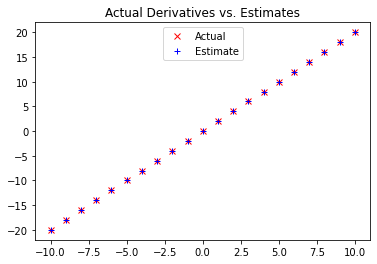

In [6]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=.001) for x in xs]

import matplotlib.pyplot as plt
plt.title('Actual Derivatives vs. Estimates')
plt.plot(xs, actuals, 'rx', label = 'Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()


When `f` is function of many variables, it has multiple *partial derivatives*, each indicating how f changes when we make smalle changes in just one of hte input variables

We calculate its *i*th partial derivative by treating it as a function of just its *i*th variable, holding the other variables fixed

In [7]:
def partial_difference_quotient(f: Callable[[Vector], float],
                                v: Vector,
                                i: int,
                                h: float) -> float:
    """Returns the -ith partial diffference quotient of f at v"""
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
         for j, v_j in enumerate(v)]
    
    return(f(w) - f(v)) / h

In [8]:
def estimate_graient(f: Callable[[Vector], float],
                     v: Vector,
                     h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

In [9]:
import random
from linear_algebra import distance, add, scalar_multiply

`sum_of_squares` (i^2 + .... i_n^2) finding the minimum among all three-dimensional vectors. We know this will be [0,0,0] but assuming we don't know it

In [10]:
def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v] # explicitly define gradient

#pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    print(epoch, v)
    
assert distance(v, [0, 0, 0]) < 0.001

0 [1.2252058650893745, -8.87457228770524, -3.9374172349775645]
1 [1.200701747787587, -8.697080841951134, -3.8586688902780133]
2 [1.1766877128318352, -8.52313922511211, -3.781495512472453]
3 [1.1531539585751984, -8.35267644060987, -3.705865602223004]
4 [1.1300908794036943, -8.185622911797672, -3.631748290178544]
5 [1.1074890618156206, -8.02191045356172, -3.559113324374973]
6 [1.085339280579308, -7.861472244490486, -3.4879310578874736]
7 [1.0636324949677218, -7.704242799600676, -3.418172436729724]
8 [1.0423598450683673, -7.550157943608663, -3.3498089879951296]
9 [1.021512648167, -7.399154784736489, -3.282812808235227]
10 [1.00108239520366, -7.25117168904176, -3.2171565520705223]
11 [0.9810607472995868, -7.1061482552609245, -3.1528134210291117]
12 [0.961439532353595, -6.964025290155706, -3.0897571526085295]
13 [0.9422107417065231, -6.824744784352592, -3.027962009556359]
14 [0.9233665268723926, -6.68824988866554, -2.967402769365232]
15 [0.9048991963349448, -6.55448489089223, -2.90805471397

**Using Gradient Descent to Fit Models**

In [11]:
# x range from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50,50)]

In this case we *Know* the parameters of the linear relationship between x and y. but imagine we'd like to learn them from the data. We'll use gradient descent to find the slope adn intercept that minimize the average squared error

We'll start off with a function that determins the gradient based on the errror from a single data point:

In [12]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept
    error = (predicted - y)
    squared_error = error ** 2        # we'll minimize squared error
    grad = [2 * error * x, 2 * error] # using its gradient
    return grad
    

In [15]:
from linear_algebra import vector_mean

# random start
theta = [random.uniform(-1,1),random.uniform(-1,1)]

learning_rate = 0.001

for epoch in range(5000):
    # compute mean of the gradients (on the full dataset)
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
print('slope = ', slope, 'intercept = ', intercept)

0 [33.86073919823928, -0.0196948993453848]
1 [10.749867259875064, 0.004205229651545649]
2 [26.16484274289298, 0.004946686452117619]
3 [15.883054837176836, 0.021101635822106418]
4 [22.741023525238873, 0.026942487387639033]
5 [18.16676425115306, 0.03962962593810265]
6 [21.217807874106846, 0.0477171309373795]
7 [19.182769865101672, 0.05883950454961161]
8 [20.540151339481735, 0.06790459540561405]
9 [19.634786961161087, 0.07830893755428459]
10 [20.23867540584311, 0.08778710664033706]
11 [19.835891291409286, 0.0978502078328995]
12 [20.10455835883784, 0.10749039870864294]
13 [19.92536706505387, 0.11737997627006354]
14 [20.04489754758534, 0.1270705833825773]
15 [19.96518040634396, 0.1368613397633975]
16 [20.01836153030834, 0.14655279749021466]
17 [19.982899412081828, 0.15627805342554255]
18 [20.006562370194846, 0.16594839673077327]
19 [19.990788847476768, 0.1756230623075066]
20 [20.001319461795305, 0.18526260503036834]
21 [19.994305181587563, 0.1948933992821029]
22 [19.99899333728038, 0.204497

Mini - Batch -> Computes the gradient on a smaller batch rather than full dataset
Stochastic Gradient Descent -> Computes on each datapoint

Tradeoffs for both

Further:
* [Sebastian Ruder - Gradient Descent Variations](http://ruder.io/optimizing-gradient-descent/index.html)